In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# cases_train.csv

In [2]:
df = pd.read_csv("../data/cases_train.csv")

In [14]:
# see what the dataframe looks like
df.head(2)

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Delhi,India,28.61474,77.20910,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered
1,NaN,NaN,Uttar Pradesh,India,25.43609,81.84718,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized


## Statistical information

In [3]:
cases_columns = ['age', 'sex', 'province', 'country', 'source', 'outcome']
for attribute in cases_columns:    
    print(f"statistics for {attribute} column")
    print(df[attribute].describe())
    print("-------------------------")

statistics for age column
count     158371
unique       337
top        35-59
freq       10785
Name: age, dtype: object
-------------------------
statistics for sex column
count     160552
unique         2
top         male
freq       88635
Name: sex, dtype: object
-------------------------
statistics for province column
count          363530
unique           1106
top       Maharashtra
freq            74894
Name: province, dtype: object
-------------------------
statistics for country column
count     367618
unique       131
top        India
freq      212411
Name: country, dtype: object
-------------------------
statistics for source column
count           239158
unique            7250
top       PH Data Drop
freq             10834
Name: source, dtype: object
-------------------------
statistics for outcome column
count              367636
unique                  4
top       nonhospitalized
freq               150000
Name: outcome, dtype: object
-------------------------


## Visualizations

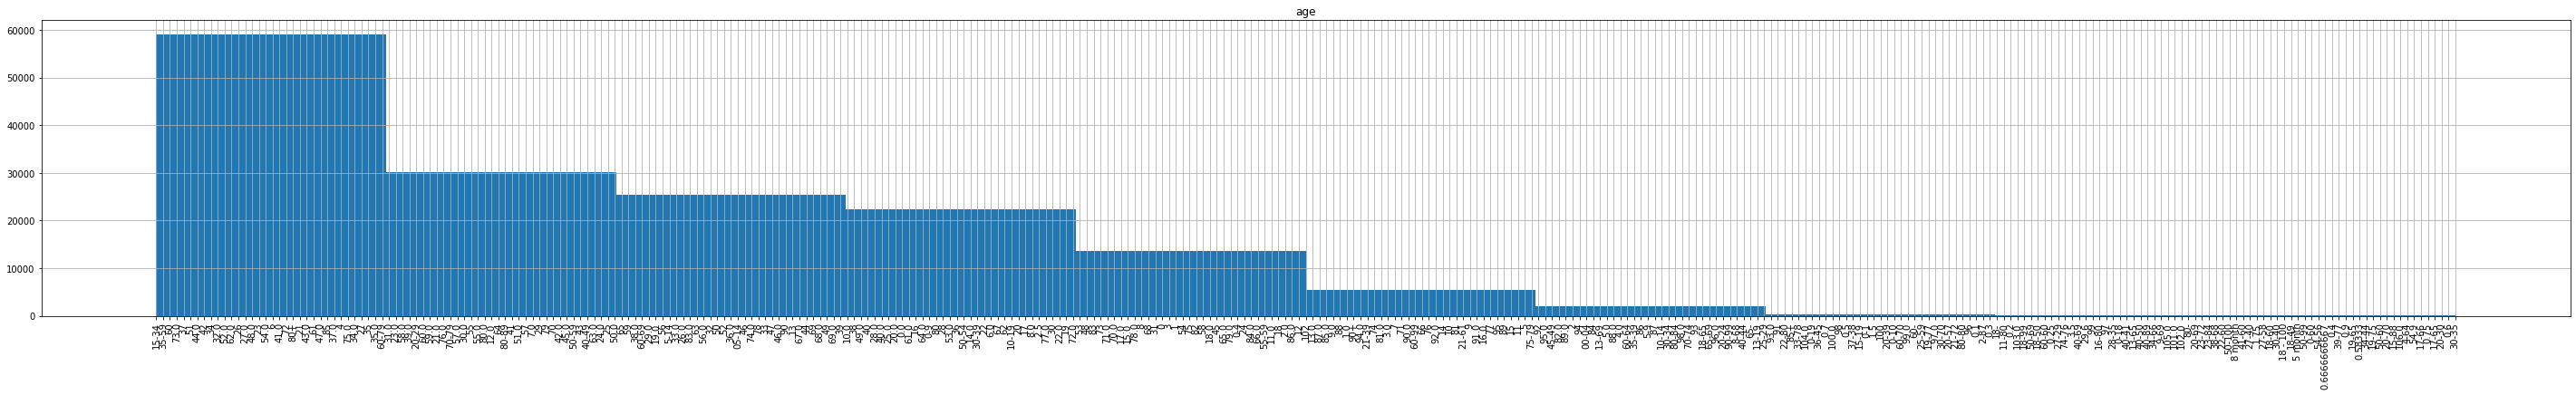

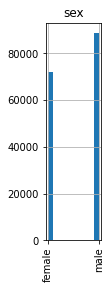

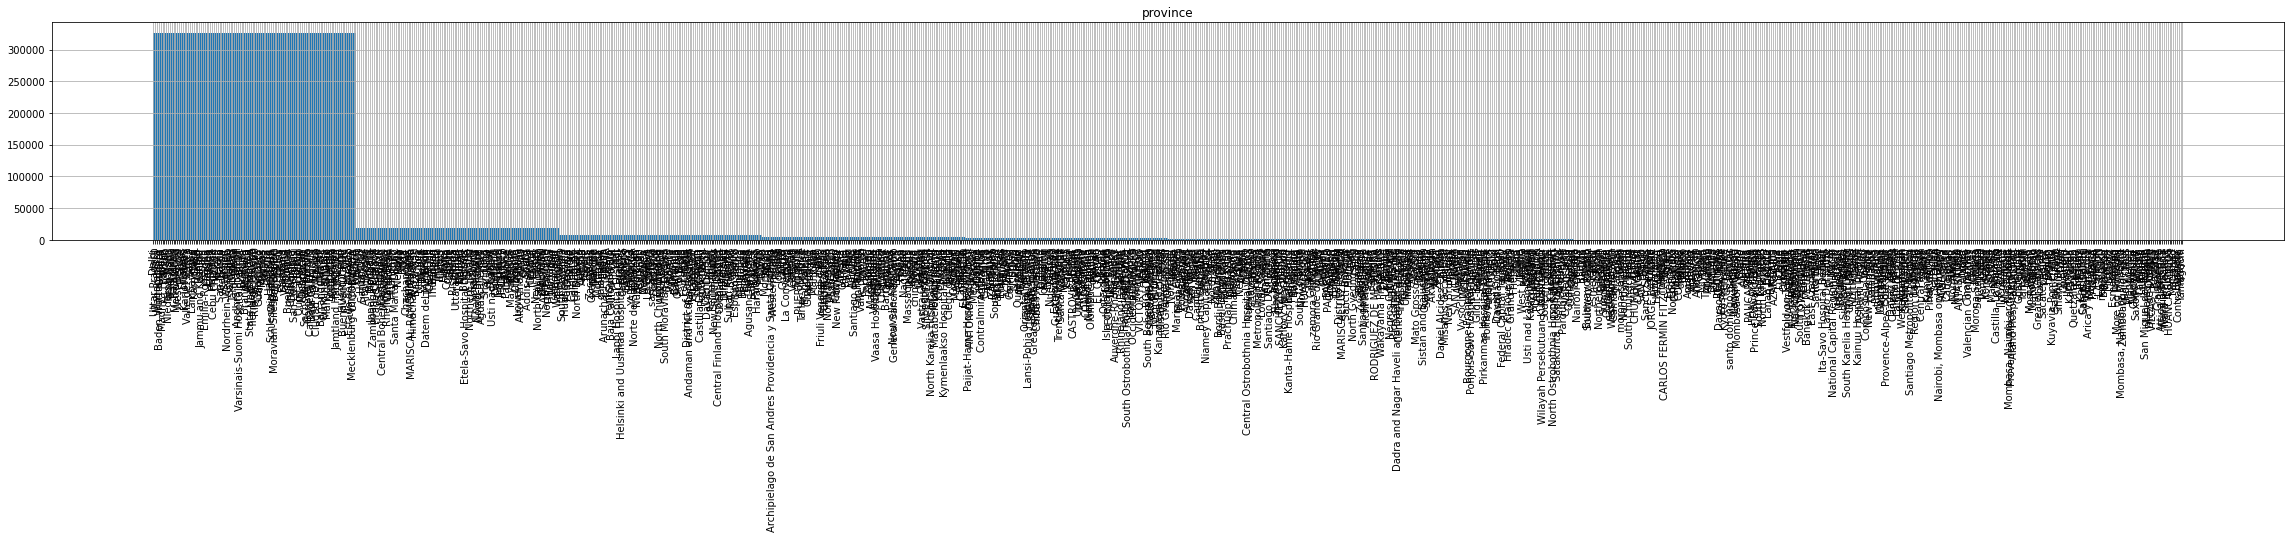

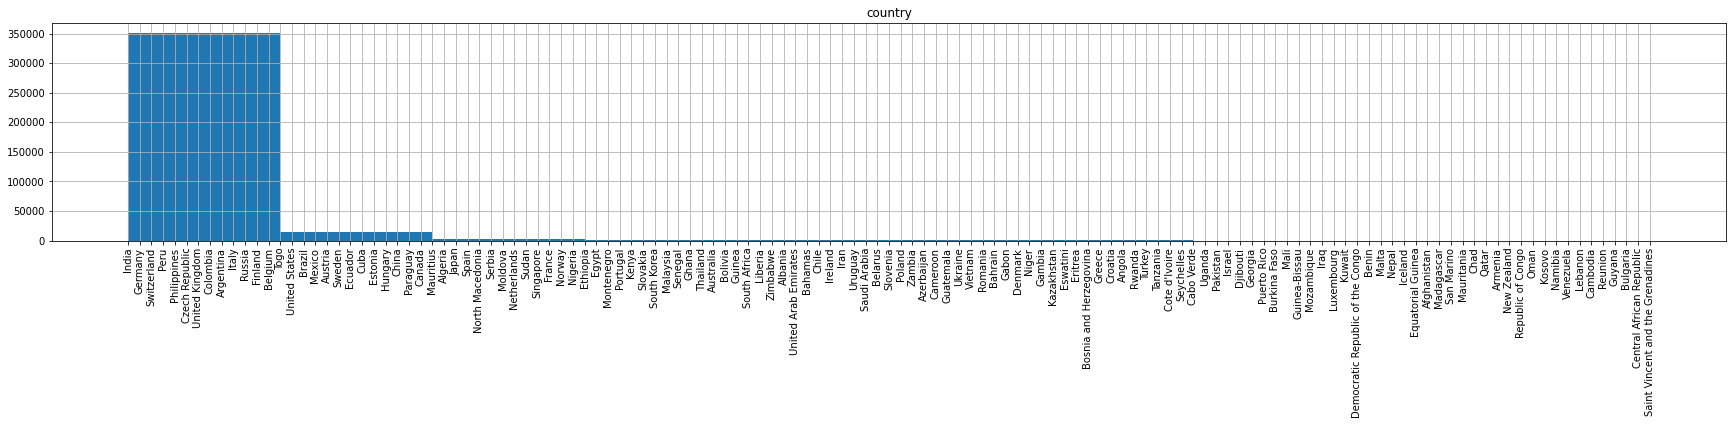

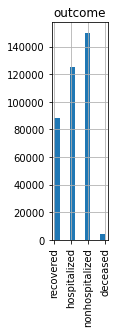

In [112]:
attribute_hist_fig_sizes = [(50,6),(1,4),(40,4),(30,4),(50,6),(1,4)]
for i, attribute in enumerate(cases_columns):
    # source column was exlucded from the histograms. Since it has over 7K unique values, jupyter notebook
    # could not properly render it.
    if attribute == "source":
        continue
    plt.figure()
    plt.title(attribute)
    df[attribute].hist(figsize=attribute_hist_fig_sizes[i], xrot=90)

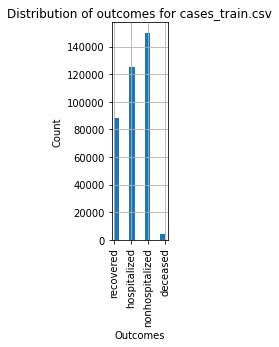

In [75]:
# age
# plot for age is saved later in section 1.3

# sex
plt.figure(figsize=(1,4))
plt.title("Distribution of genders for cases_train.csv")
plt.xlabel("Genders")
plt.ylabel("Count")
df['sex'].hist(xrot=90)
plt.savefig("../plots/cases_train_sex_distribution.png", facecolor='white', bbox_inches = "tight")

# province
fig = plt.figure(figsize=(40,4))
plt.title("Distribution of province_states with >200 cases in cases_train.csv")
plt.xlabel("Province")
plt.ylabel("Count")
plt.xticks(rotation=90)
df_prov = df.groupby(['province'], as_index=False).count()
df_prov = df_prov[df_prov['country'] > 200]
df_prov = df_prov.sort_values(by='country', ascending=False)
plt.bar(df_prov['province'], df_prov['country'])
plt.savefig("../plots/cases_train_provinces>200cases.png", facecolor='white', bbox_inches = "tight")

# country
plt.figure(figsize=(30,4))
plt.title("Distribution of countires for cases_train.csv")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
df_country = df.groupby(['country'], as_index=False).count()
df_country = df_country.sort_values(by='latitude', ascending=False) # per review of data, only two rows are missing latitude, so it's an appropriate column to count by
plt.bar(df_country['country'], df_country['latitude'])
plt.savefig("../plots/cases_train_countries_distribution.png", facecolor='white', bbox_inches = "tight")

# outcome
plt.figure(figsize=(1,4))
plt.title("Distribution of outcomes for cases_train.csv")
plt.xlabel("Outcomes")
plt.ylabel("Count")
df['outcome'].hist(xrot=90)
plt.savefig("../plots/cases_train_outcome_distribution.png", facecolor='white', bbox_inches = "tight")


#### Visualization for date_confirmation

In [77]:
def convert_to_datetime(row):
    date_string = row['date_confirmation']
    if '-' in str(date_string):
        return
    return pd.to_datetime(date_string)

In [78]:
# remove date ranges so data can be plotted
df['converted_datetime'] = df.apply(convert_to_datetime, axis=1)

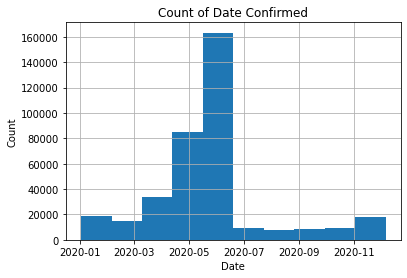

In [80]:
plt.figure()
plt.title('Count of Date Confirmed')
plt.ylabel('Count')
plt.xlabel('Date')
df['converted_datetime'].hist()
plt.savefig("../plots/cases_train_date_confirmed.png", facecolor='white', bbox_inches = "tight")

#### Visualization for longitude and latitude

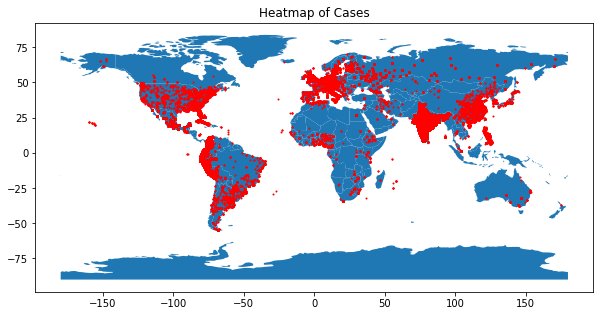

In [81]:
# modified from https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry) 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=1);
plt.title('Heatmap of Cases')
plt.savefig("../plots/cases_train_lat_long_mapped.png", facecolor='white', bbox_inches = "tight")

## Number of missing values

In [40]:
df.isnull().sum()

age                       209265
sex                       207084
province                    4106
country                       18
latitude                       2
longitude                      2
date_confirmation            288
additional_information    344912
source                    128478
outcome                        0
dtype: int64

# location.csv

In [3]:
df_loc = pd.read_csv("../data/location.csv")

In [7]:
# see what the dataframe looks like
df_loc.head(2)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.93911,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.15330,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186


## Statistical Information

In [10]:
location_columns = ['Province_State', 'Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incidence_Rate', 'Case-Fatality_Ratio']
for attribute in location_columns:    
    print(f"statistics for {attribute} column")
    print(df_loc[attribute].describe())
    print("-------------------------")

statistics for Province_State column
count      3786
unique      562
top       Texas
freq        255
Name: Province_State, dtype: object
-------------------------
statistics for Country_Region column
count     3954
unique     188
top         US
freq      3270
Name: Country_Region, dtype: object
-------------------------
statistics for Last_Update column
count                    3954
unique                      3
top       2020-09-20 04:22:56
freq                     3951
Name: Last_Update, dtype: object
-------------------------
statistics for Confirmed column
count    3.954000e+03
mean     7.760496e+03
std      4.184036e+04
min      0.000000e+00
25%      1.370000e+02
50%      4.985000e+02
75%      2.129000e+03
max      1.167496e+06
Name: Confirmed, dtype: float64
-------------------------
statistics for Deaths column
count     3954.000000
mean       241.740769
std       1476.661533
min          0.000000
25%          1.000000
50%          9.000000
75%         48.000000
max      37076.0

## Visualizations

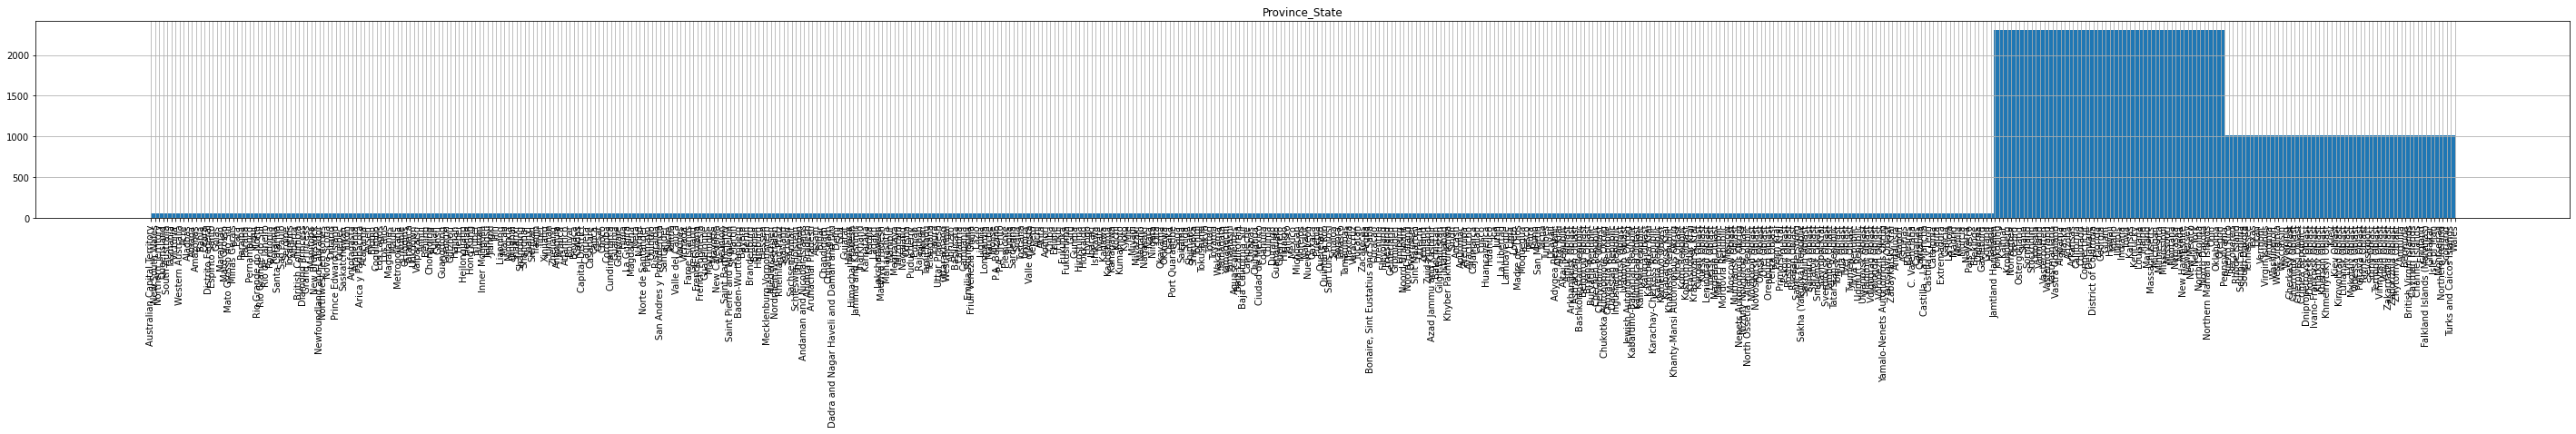

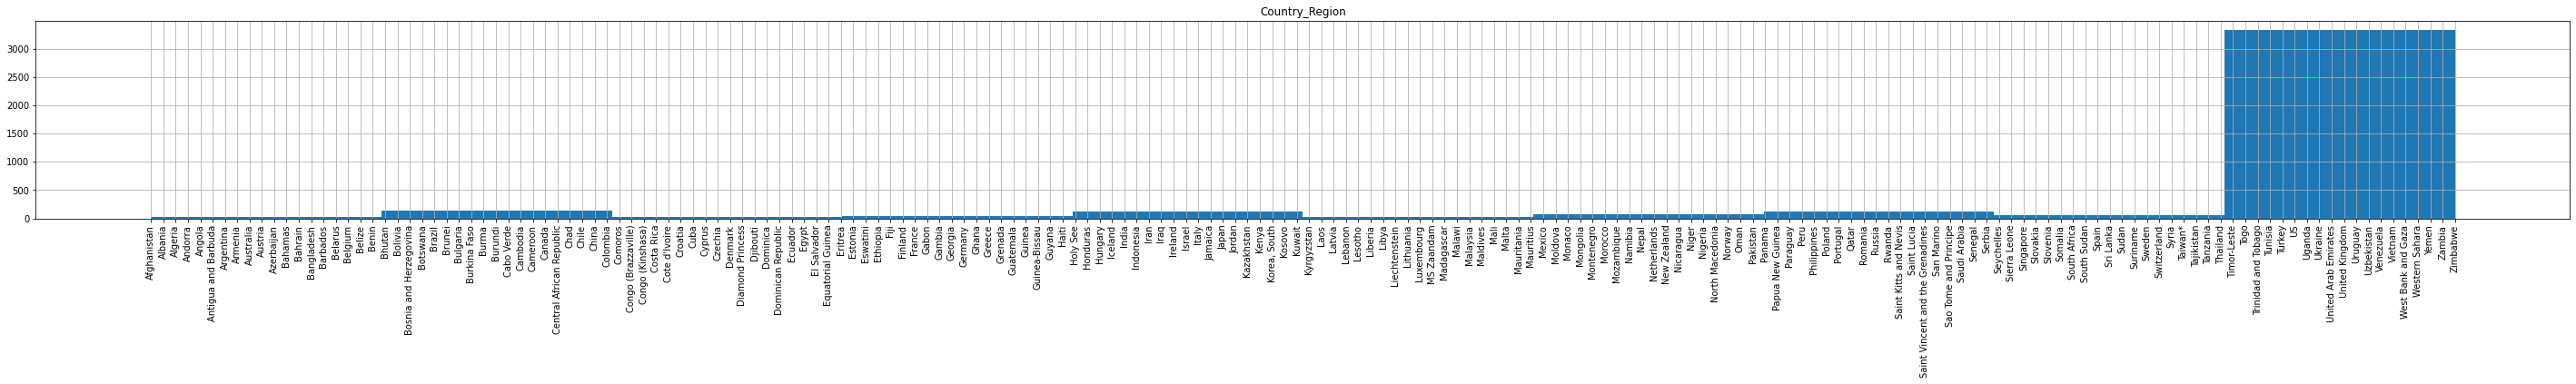

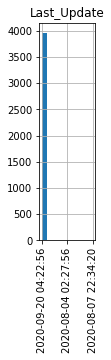

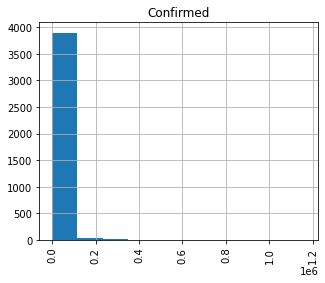

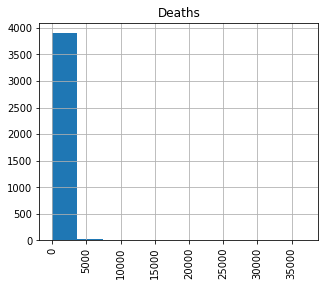

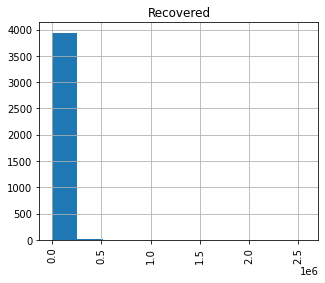

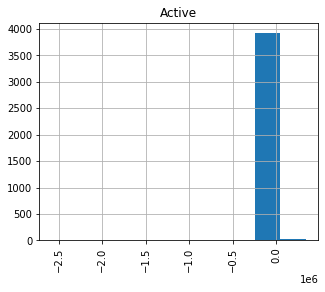

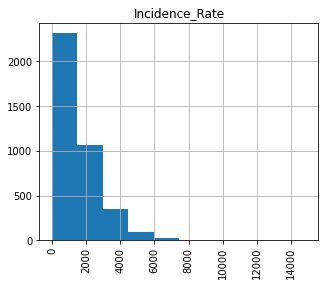

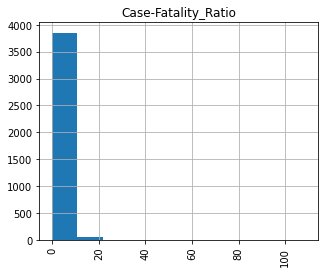

In [17]:
attribute_hist_fig_sizes = [(50,4),(50,4),(1,4),(5,4),(5,4),(5,4),(5,4),(5,4),(5,4)]
for i, attribute in enumerate(location_columns):
    plt.figure()
    plt.title(attribute)
    df_loc[attribute].hist(figsize=attribute_hist_fig_sizes[i], xrot=90)

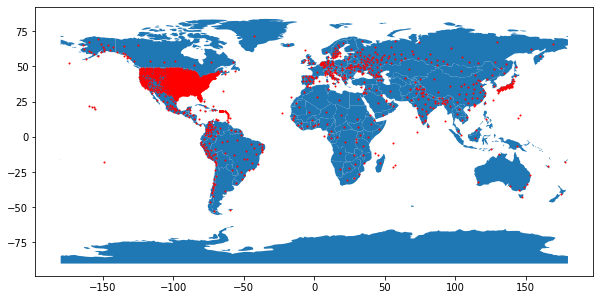

In [23]:
# modified from https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
geometry = [Point(xy) for xy in zip(df_loc['Long_'], df_loc['Lat'])]
gdf = GeoDataFrame(df_loc, geometry=geometry) 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=1);

## Number of Missing Values

In [24]:
df_loc.isnull().sum()

Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incidence_Rate          80
Case-Fatality_Ratio     48
geometry                 0
dtype: int64